In [285]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [130]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

# score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [272]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.005)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [273]:
data = pd.read_csv('Full_Descriptors.csv')

# get data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [274]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 10, 'epochs': 100}
CV score for GS -0.5624883766623522
Train AUC ROC Score for GS:  0.6220227867509054
Test AUC ROC Score for GS:  0.5724699828473413
Train Mean Absolute Error: 187    0.001525
140    0.007667
289    0.008126
315    0.009183
294    0.009611
         ...   
124    0.048912
321    0.001663
16     0.014715
126    0.016930
266    0.012656
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.019391
112    0.021738
98     0.000273
190    0.012580
57     0.001897
         ...   
195    0.004598
79     0.011664
101    0.004195
209    0.008548
127    0.005284
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  -0.17590363713012813
Test R2:  -0.7431784396892689
Train MSE:  0.0002621509937783137
Test MSE:  0.0001695650145905088


In [281]:
def create_new_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 model.add(BatchNormalization())
 # Compile model
 opt = optimizers.Adam(learning_rate=0.026)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [282]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_new_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 100, 'epochs': 100}
CV score for GS 0.5654385527062725
Train AUC ROC Score for GS:  0.8395278754394776
Test AUC ROC Score for GS:  0.7356346483704974
Train Mean Absolute Error: 187    0.000017
140    0.006644
289    0.000030
315    0.002423
294    0.001120
         ...   
124    0.029274
321    0.001789
16     0.002236
126    0.001227
266    0.000885
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.007254
112    0.003548
98     0.003612
190    0.003592
57     0.002724
         ...   
195    0.011559
79     0.000205
101    0.004621
209    0.006896
127    0.007630
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  0.755221482338999
Test R2:  0.47676375711758723
Train MSE:  5.456988960168754e-05
Test MSE:  5.089700465458638e-05


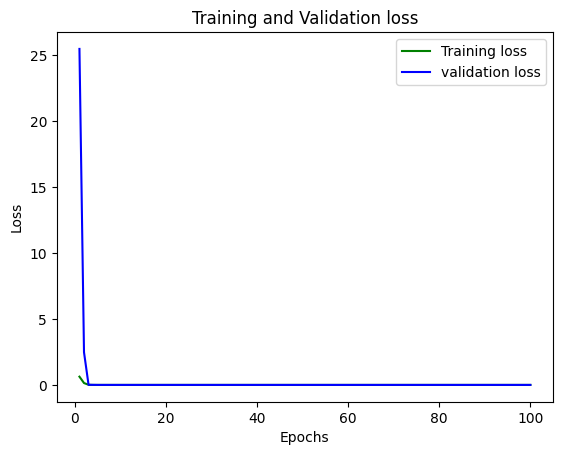

In [286]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()